In [767]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [768]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [769]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193045 entries, 0 to 1193044
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1193045 non-null  int64  
 1   kWh       1193045 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 18.2 MB


In [770]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1193040    0.13
1193041    0.13
1193042    0.13
1193043    0.14
1193044    0.13
Name: kWh, Length: 1193045, dtype: float64

In [771]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1193040    0.13
1193041    0.13
1193042    0.13
1193043    0.14
1193044    0.13
Name: kWh, Length: 1193045, dtype: float64

In [772]:
l=len(conso_data)-1
l

1193044

In [773]:
conso_data['sec']=conso_data['Interval']/1000


In [774]:
conso_data['Wh']=3600000/conso_data['Interval']


In [775]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [776]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1193045 entries, 0 to 1193044
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1193045 non-null  int64  
 1   kWh        1193045 non-null  float64
 2   sec        1193045 non-null  float64
 3   Wh         1193045 non-null  float64
 4   cumul(ms)  1193045 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 45.5 MB


In [777]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1193040,27232,0.13,27.232,132.197415,28050800467
1193041,26866,0.13,26.866,133.998362,28050827333
1193042,26945,0.13,26.945,133.605493,28050854278
1193043,26464,0.14,26.464,136.033857,28050880742
1193044,27030,0.13,27.030,133.185350,28050907772


In [778]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

28050907772000

In [779]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 19, 0, 53, 168935)

In [780]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [781]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [782]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [783]:
conso_data['dates']

0         2023-08-21 19:01:15.102935
1         2023-08-21 19:01:36.960935
2         2023-08-21 19:01:58.961935
3         2023-08-21 19:02:20.889935
4         2023-08-21 19:02:42.780935
                     ...            
1193040   2024-07-11 10:54:13.635935
1193041   2024-07-11 10:54:40.501935
1193042   2024-07-11 10:55:07.446935
1193043   2024-07-11 10:55:33.910935
1193044   2024-07-11 10:56:00.940935
Name: dates, Length: 1193045, dtype: datetime64[ns]

In [784]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 19:01:15.102935,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 19:01:36.960935,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 19:01:58.961935,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 19:02:20.889935,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 19:02:42.780935,21/08/23
...,...,...,...,...,...,...,...
1193040,27232,0.13,27.232,132.197415,28050800467,2024-07-11 10:54:13.635935,11/07/24
1193041,26866,0.13,26.866,133.998362,28050827333,2024-07-11 10:54:40.501935,11/07/24
1193042,26945,0.13,26.945,133.605493,28050854278,2024-07-11 10:55:07.446935,11/07/24
1193043,26464,0.14,26.464,136.033857,28050880742,2024-07-11 10:55:33.910935,11/07/24


In [785]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, date, month, year


('11/07/24', 11, 7, 2024)

In [786]:
here = now.strftime('%H:%M:%S')
here

'10:56:22'

In [787]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [788]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1297 entries, 1191748 to 1193044
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1297 non-null   int64         
 1   kWh        1297 non-null   float64       
 2   sec        1297 non-null   float64       
 3   Wh         1297 non-null   float64       
 4   cumul(ms)  1297 non-null   int64         
 5   dates      1297 non-null   datetime64[ns]
 6   days       1297 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 81.1+ KB


In [789]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [790]:
data = list(df_grp['kWh'])
print(data)


[0.843, 3.701, 4.231, 3.686, 4.189, 4.613, 3.516, 3.405, 3.521, 3.692, 3.787, 3.772, 4.257, 3.816, 3.453, 3.64, 3.324, 3.374, 4.302, 3.999, 4.048, 3.922, 3.438, 4.467, 3.729, 3.762, 4.394, 4.672, 3.791, 3.218, 3.18, 4.01, 3.662, 3.175, 3.791, 4.164, 3.747, 3.567, 4.785, 4.18, 4.55, 3.77, 3.402, 4.31, 3.872, 3.87, 3.433, 4.081, 3.654, 3.399, 4.132, 3.382, 3.892, 3.836, 3.641, 3.749, 4.244, 3.301, 3.871, 2.975, 2.054, 2.044, 2.458, 4.09, 3.724, 4.331, 3.626, 3.907, 3.745, 3.933, 3.973, 4.12, 3.638, 3.161, 3.803, 3.509, 3.627, 3.707, 3.686, 3.236, 3.909, 3.216, 3.793, 3.599, 4.086, 3.607, 3.342, 3.824, 4.059, 4.385, 4.081, 3.998, 4.226, 3.75, 3.923, 3.867, 3.913, 3.746, 4.041, 4.345, 3.888, 3.502, 3.683, 3.674, 3.342, 3.848, 3.993, 4.105, 3.473, 4.175, 3.608, 4.09, 4.521, 3.686, 3.428, 3.575, 4.175, 3.684, 4.082, 3.981, 3.744, 3.592, 5.131, 3.696, 3.765, 4.298, 4.097, 4.737, 4.39, 3.976, 3.786, 4.362, 4.675, 4.204, 4.786, 4.327, 3.707, 4.195, 3.701, 3.629, 3.524, 3.956, 3.666, 3.787, 3.57

In [791]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [792]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [793]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [794]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.308409
dtype: float64

In [795]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.659647
dtype: float64

In [796]:
last=df_grp.iloc[-1]['kWh']
last

1.297

In [797]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1297 entries, 1191748 to 1193044
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1297 non-null   int64         
 1   kWh        1297 non-null   float64       
 2   sec        1297 non-null   float64       
 3   Wh         1297 non-null   float64       
 4   cumul(ms)  1297 non-null   int64         
 5   dates      1297 non-null   datetime64[ns]
 6   days       1297 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 81.1+ KB


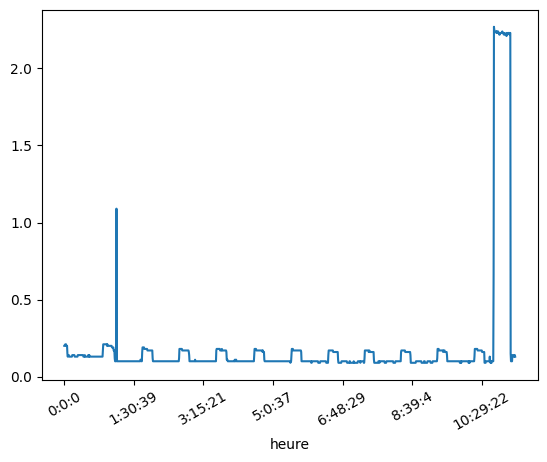

In [798]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);

In [799]:
conso_day['heure']


1191748       0:0:0
1191749      0:0:19
1191750      0:0:36
1191751      0:0:53
1191752      0:1:11
             ...   
1193040    10:54:13
1193041    10:54:40
1193042     10:55:7
1193043    10:55:33
1193044     10:56:0
Name: heure, Length: 1297, dtype: object

In [800]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:0',
             days  kWh
  heure               
  0:0:0  11/07/24  0.2),
 ('0:0:19',
              days  kWh
  heure                
  0:0:19  11/07/24  0.2),
 ('0:0:36',
              days  kWh
  heure                
  0:0:36  11/07/24  0.2),
 ('0:0:53',
              days   kWh
  heure                 
  0:0:53  11/07/24  0.21),
 ('0:1:11',
              days   kWh
  heure                 
  0:1:11  11/07/24  0.21),
 ('0:1:28',
              days   kWh
  heure                 
  0:1:28  11/07/24  0.21),
 ('0:1:46',
              days  kWh
  heure                
  0:1:46  11/07/24  0.2),
 ('0:2:4',
             days  kWh
  heure               
  0:2:4  11/07/24  0.2),
 ('0:2:22',
              days  kWh
  heure                
  0:2:22  11/07/24  0.2),
 ('0:2:45',
              days   kWh
  heure                 
  0:2:45  11/07/24  0.15),
 ('0:3:12',
              days   kWh
  heure                 
  0:3:12  11/07/24  0.13),
 ('0:3:38',
              days   kWh
  heure   

In [801]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:0',
  heure
  0:0:0    0.2
  Name: kWh, dtype: float64),
 ('0:0:19',
  heure
  0:0:19    0.2
  Name: kWh, dtype: float64),
 ('0:0:36',
  heure
  0:0:36    0.2
  Name: kWh, dtype: float64),
 ('0:0:53',
  heure
  0:0:53    0.21
  Name: kWh, dtype: float64),
 ('0:1:11',
  heure
  0:1:11    0.21
  Name: kWh, dtype: float64),
 ('0:1:28',
  heure
  0:1:28    0.21
  Name: kWh, dtype: float64),
 ('0:1:46',
  heure
  0:1:46    0.2
  Name: kWh, dtype: float64),
 ('0:2:4',
  heure
  0:2:4    0.2
  Name: kWh, dtype: float64),
 ('0:2:22',
  heure
  0:2:22    0.2
  Name: kWh, dtype: float64),
 ('0:2:45',
  heure
  0:2:45    0.15
  Name: kWh, dtype: float64),
 ('0:3:12',
  heure
  0:3:12    0.13
  Name: kWh, dtype: float64),
 ('0:3:38',
  heure
  0:3:38    0.14
  Name: kWh, dtype: float64),
 ('0:4:5',
  heure
  0:4:5    0.14
  Name: kWh, dtype: float64),
 ('0:4:31',
  heure
  0:4:31    0.14
  Name: kWh, dtype: float64),
 ('0:4:58',
  heure
  0:4:58    0.13
  Name: kWh, dtype: float64),
 ('0:5:

In [802]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:0,18167,0.20,18.167,198.161502,28011547831,2024-07-11 00:00:00.999935,11/07/24
0:0:19,18180,0.20,18.180,198.019802,28011566011,2024-07-11 00:00:19.179935,11/07/24
0:0:36,17753,0.20,17.753,202.782628,28011583764,2024-07-11 00:00:36.932935,11/07/24
0:0:53,17048,0.21,17.048,211.168466,28011600812,2024-07-11 00:00:53.980935,11/07/24
0:1:11,17363,0.21,17.363,207.337442,28011618175,2024-07-11 00:01:11.343935,11/07/24
...,...,...,...,...,...,...,...
10:54:13,27232,0.13,27.232,132.197415,28050800467,2024-07-11 10:54:13.635935,11/07/24
10:54:40,26866,0.13,26.866,133.998362,28050827333,2024-07-11 10:54:40.501935,11/07/24
10:55:7,26945,0.13,26.945,133.605493,28050854278,2024-07-11 10:55:07.446935,11/07/24


In [803]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [804]:
df.iloc[0].dates

Timestamp('2024-07-11 00:00:00.999935')

In [805]:
df.dates.dt.time

heure
0:0:0       00:00:00.999935
0:0:19      00:00:19.179935
0:0:36      00:00:36.932935
0:0:53      00:00:53.980935
0:1:11      00:01:11.343935
                 ...       
10:54:13    10:54:13.635935
10:54:40    10:54:40.501935
10:55:7     10:55:07.446935
10:55:33    10:55:33.910935
10:56:0     10:56:00.940935
Name: dates, Length: 1297, dtype: object

In [806]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [807]:
tranches = len(df)//1000
tranches+1

2

In [808]:
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-07-11 00:00:00.999935	2024-07-11 08:38:26.316935	8h 38m 25s 	1000
2024-07-11 08:38:26.316935	2024-07-11 10:56:00.940935	2h 17m 34s 	297


In [809]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('10:56:22', 1.297, 1297)

In [810]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1297 entries, 0:0:0 to 10:56:0
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1297 non-null   int64         
 1   kWh        1297 non-null   float64       
 2   sec        1297 non-null   float64       
 3   Wh         1297 non-null   float64       
 4   cumul(ms)  1297 non-null   int64         
 5   dates      1297 non-null   datetime64[ns]
 6   days       1297 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 113.4+ KB


In [811]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)

In [812]:
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 326 entries, 21/08/23 to 11/07/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     326 non-null    float64
dtypes: float64(1)
memory usage: 5.1+ KB


In [813]:
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')

In [814]:
df_grp.tail(7)

,kWh
days,
05/07/24,2.083
06/07/24,2.281
07/07/24,3.633
08/07/24,3.141
09/07/24,3.601
10/07/24,3.688
11/07/24,1.297


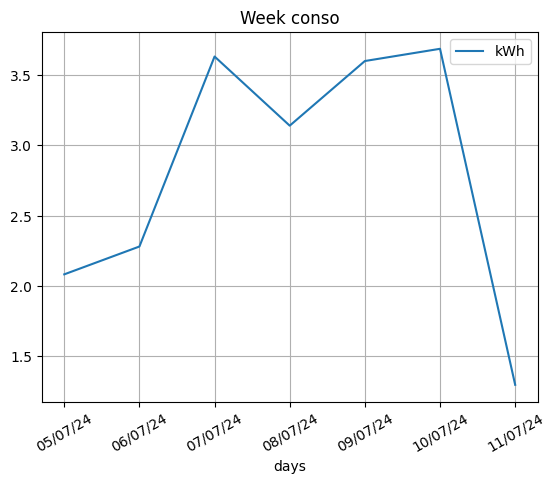

In [815]:
# last week conso
df_grp.tail(7).plot(grid=True)
plt.title('Week conso')
plt.xticks(rotation=30);

In [816]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [817]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


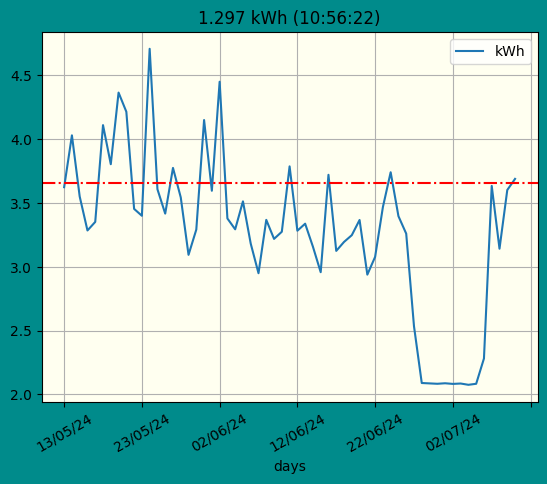

In [818]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [819]:
df_grp.mean()

kWh    3.659647
dtype: float64

In [820]:
#df_grp.head()
df_grp.tail(14)

,kWh
days,
28/06/24,2.089
29/06/24,2.086
30/06/24,2.083
01/07/24,2.087
02/07/24,2.082
03/07/24,2.085
04/07/24,2.075
05/07/24,2.083
06/07/24,2.281


<Axes: xlabel='days'>

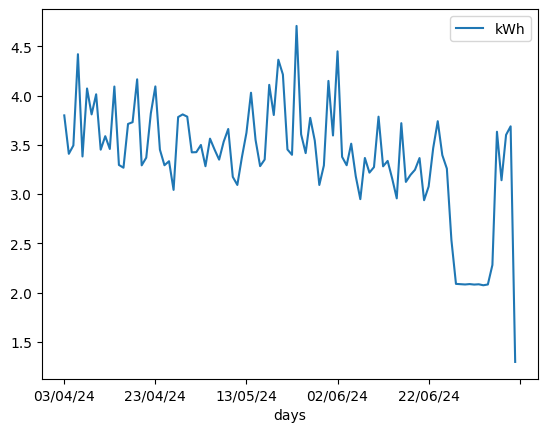

In [821]:
df_grp.tail(100).plot()

In [822]:
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()


,kWh
count,30.000000
mean,2.953167
std,0.622642
min,2.075000
25%,2.137000
50%,3.149000
75%,3.388500
max,3.786000


In [823]:
month = df_grp.iloc[-31:-1]['kWh']
print(month.idxmax(), max(month))
print(month.idxmin(), min(month))

11/06/24 3.786
04/07/24 2.075


In [824]:
day

'11/07/24'

In [825]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1191748,18167,0.20,18.167,198.161502,28011547831,2024-07-11 00:00:00.999935,11/07/24,0:0:0
1191749,18180,0.20,18.180,198.019802,28011566011,2024-07-11 00:00:19.179935,11/07/24,0:0:19
1191750,17753,0.20,17.753,202.782628,28011583764,2024-07-11 00:00:36.932935,11/07/24,0:0:36
1191751,17048,0.21,17.048,211.168466,28011600812,2024-07-11 00:00:53.980935,11/07/24,0:0:53
1191752,17363,0.21,17.363,207.337442,28011618175,2024-07-11 00:01:11.343935,11/07/24,0:1:11
...,...,...,...,...,...,...,...,...
1193040,27232,0.13,27.232,132.197415,28050800467,2024-07-11 10:54:13.635935,11/07/24,10:54:13
1193041,26866,0.13,26.866,133.998362,28050827333,2024-07-11 10:54:40.501935,11/07/24,10:54:40
1193042,26945,0.13,26.945,133.605493,28050854278,2024-07-11 10:55:07.446935,11/07/24,10:55:7
1193043,26464,0.14,26.464,136.033857,28050880742,2024-07-11 10:55:33.910935,11/07/24,10:55:33


In [826]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1297 entries, 1191748 to 1193044
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   1297 non-null   int64         
 1   kWh        1297 non-null   float64       
 2   sec        1297 non-null   float64       
 3   Wh         1297 non-null   float64       
 4   cumul(ms)  1297 non-null   int64         
 5   dates      1297 non-null   datetime64[ns]
 6   days       1297 non-null   object        
 7   heure      1297 non-null   object        
 8   hours      1297 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 101.3+ KB


In [827]:
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1191748    00  0.20
  1191749    00  0.20
  1191750    00  0.20
  1191751    00  0.21
  1191752    00  0.21
  ...       ...   ...
  1191890    00  0.17
  1191891    00  0.17
  1191892    00  0.17
  1191893    00  0.12
  1191894    00  0.10
  
  [147 rows x 2 columns]),
 ('01',
          hours   kWh
  1191895    01  0.10
  1191896    01  0.10
  1191897    01  0.10
  1191898    01  1.09
  1191899    01  0.12
  ...       ...   ...
  1192006    01  0.10
  1192007    01  0.10
  1192008    01  0.10
  1192009    01  0.10
  1192010    01  0.10
  
  [116 rows x 2 columns]),
 ('02',
          hours  kWh
  1192011    02  0.1
  1192012    02  0.1
  1192013    02  0.1
  1192014    02  0.1
  1192015    02  0.1
  ...       ...  ...
  1192118    02  0.1
  1192119    02  0.1
  1192120    02  0.1
  1192121    02  0.1
  1192122    02  0.1
  
  [112 rows x 2 columns]),
 ('03',
          hours   kWh
  1192123    03  0.10
  1192124    03  0.11
  1192125    03  0.10
  1192126 

In [828]:
groupedbyhour.count()

,kWh
hours,
00,147
01,116
02,112
03,113
04,111
05,112
06,108
07,107
08,108


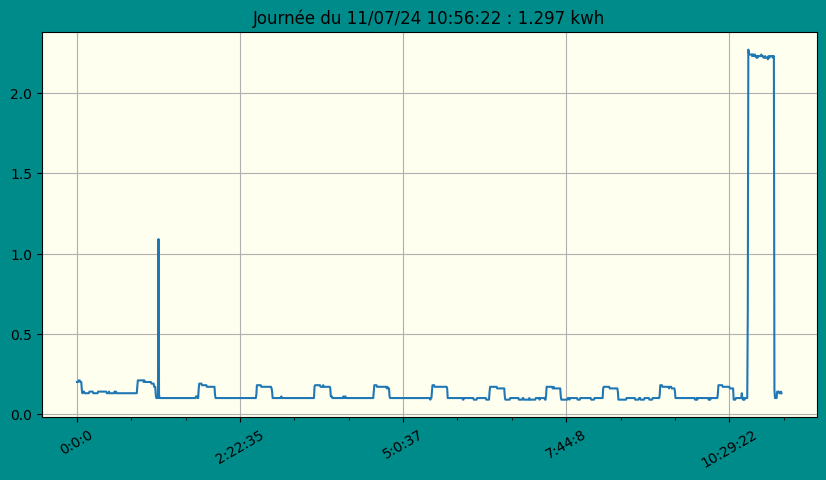

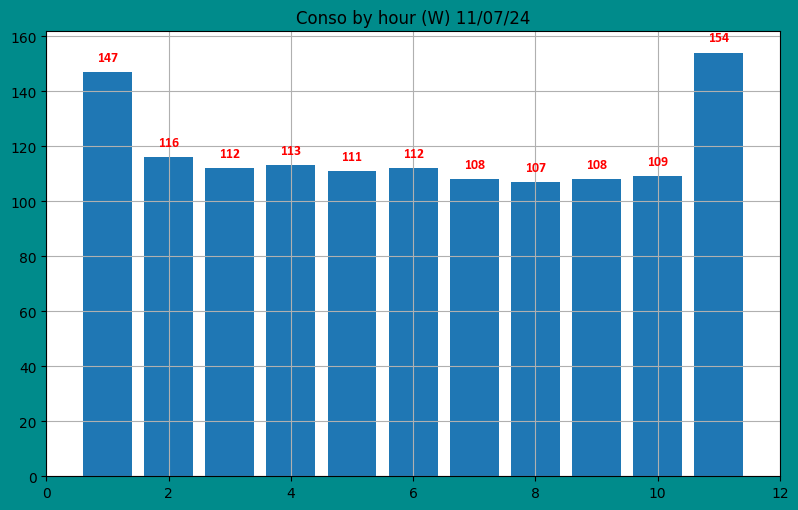

In [829]:
show(day,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [830]:
import os
os.listdir(path='.')

['.git',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.csv',
 '8days.pkl',
 '8days_dump.json',
 '8days_to_json.json',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipynb',
 'date_formatter_pandas.ipynb',
 'decimals

In [831]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

8days.csv
Apple.csv
CAC40.csv
conso_data.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [832]:
#conso_byhour(day)

In [833]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

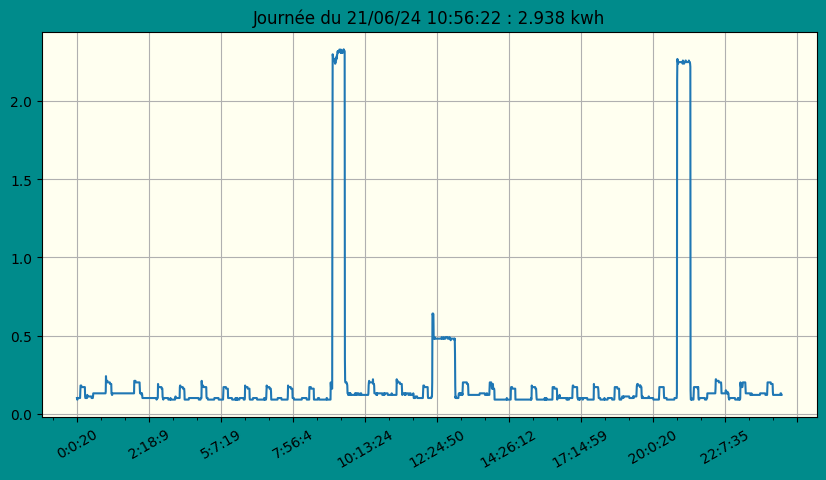

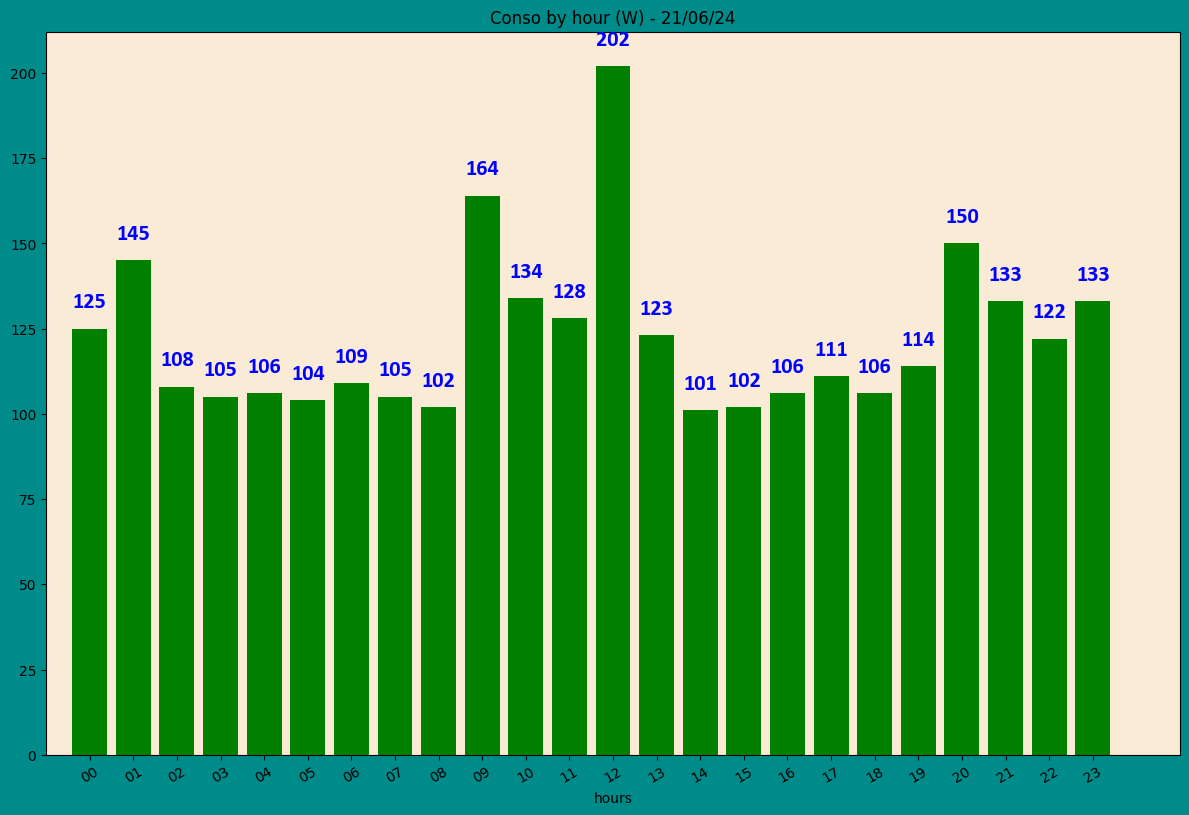

In [834]:
# plot any day
day = '21/06/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

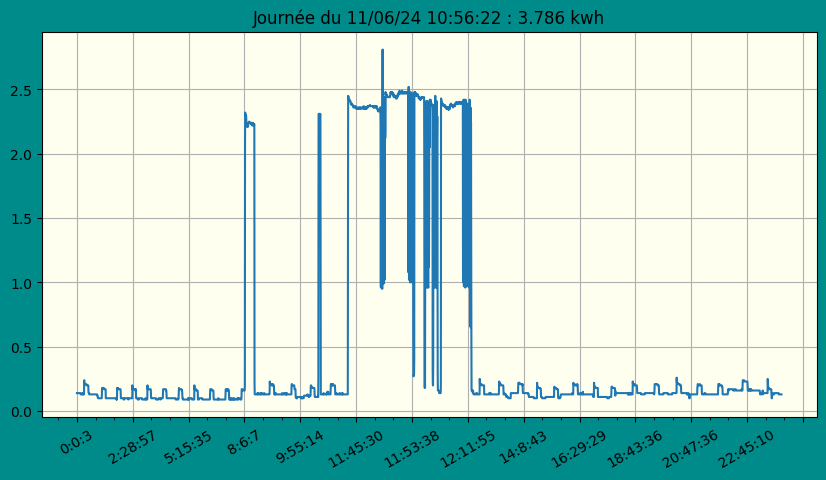

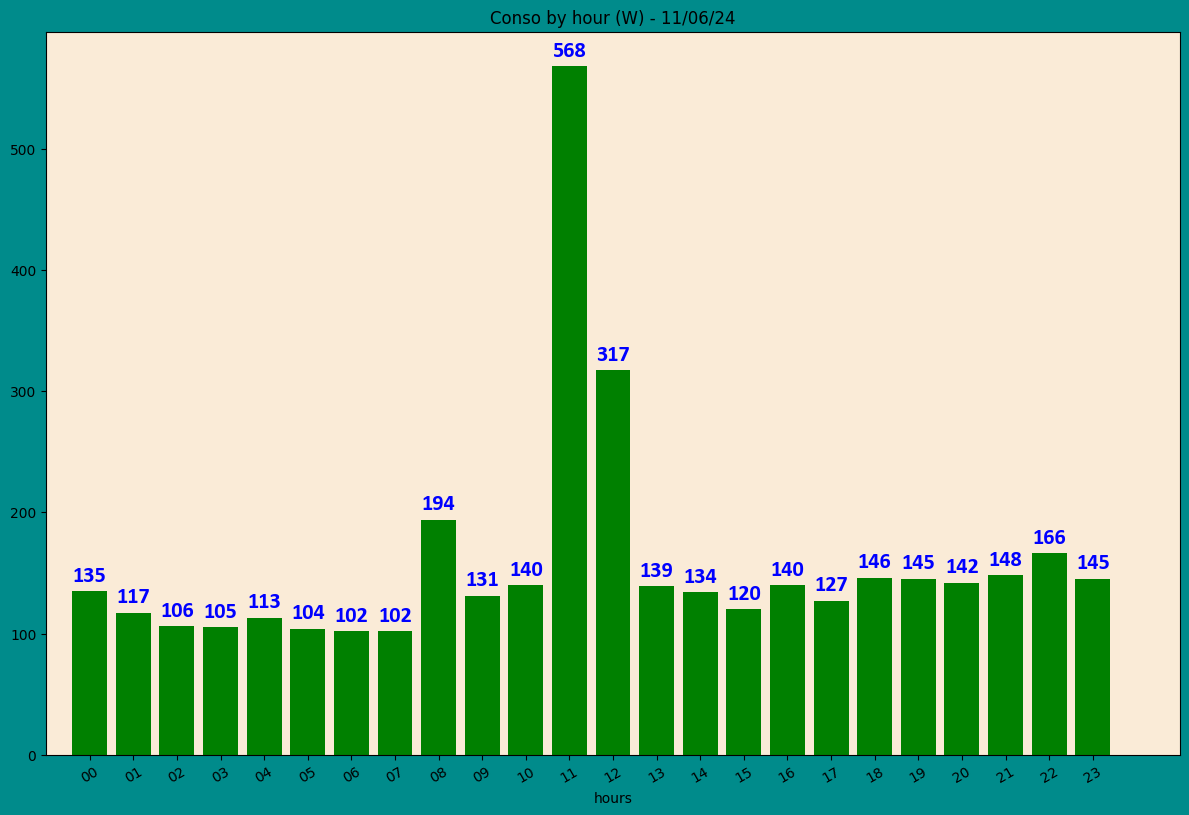

In [835]:
# plot day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [836]:
filename='conso_data.csv'
#conso_data.to_csv(filename)